In [45]:
import sys
import os

import numpy as np

dir_root =os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))
sys.path.append(dir_root)
import myLibrary as mL

import netCDF4 as nc
import pandas as pd

In [2]:
STATION_ID_1 = 'venf1'
YEAR = '2020'

In [3]:
ds_ERA5_1 = nc.Dataset(f'ERA5_downloads/singleStations/{STATION_ID_1}_{YEAR}.nc')

In [4]:
u10 = ds_ERA5_1.variables["u10"][:, :, 0].data
v10 = ds_ERA5_1.variables["v10"][:, :, 0].data

In [5]:
WDIR = []
WSPD = []
for v, u in zip(v10, u10):
    WDIR.append(mL.calc_WDIR(v,u))
    WSPD.append(mL.calcWSPD(v,u))

In [6]:
df = pd.DataFrame({
    f'u10_{STATION_ID_1}': u10[:,0],
    f'v10_{STATION_ID_1}': v10[:,0],
    f'WDIR_{STATION_ID_1}': WDIR,        # WDIR
    f'WSPD_{STATION_ID_1}': WSPD,        # WSPD
})

df

,u10_venf1,v10_venf1,WDIR_venf1,WSPD_venf1
0,0.496071,-4.414787,270.111896,4.442570
1,0.856801,-4.222514,270.200195,4.308565
2,1.146837,-4.259305,270.263017,4.410999
3,1.257273,-4.350842,270.281309,4.528859
4,1.519414,-4.513332,270.324733,4.762225
...,...,...,...,...
8779,-3.743654,6.117713,90.549150,7.172263
8780,-3.393242,6.151438,90.504084,7.025260
8781,-3.273635,5.978874,90.500948,6.816423
8782,-4.118523,4.865096,90.702485,6.374275


<AxesSubplot:>

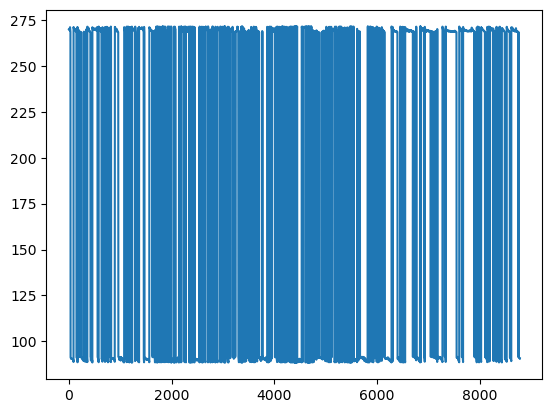

In [7]:
df["WDIR_venf1"].plot()

In [46]:
import math


def calc_WDIR(v, u):
    if v == 0:
        return 0
    alpha = math.degrees(math.atan(u / v)) # angle in triangle of v, u and WSPD vectors
    print("Alpha = ", alpha)

    if v > 0:  # East-Wind
        WDIR = 90 - alpha
    else:  # v < 0 ... West-Wind
        WDIR = 270 - alpha

    return WDIR

In [47]:
v = 1
u = 2
# expected: 30°
calc_WDIR(v, u)

Alpha =  63.43494882292202


26.565051177077983

In [48]:
def calc_WDIR_2(v, u):

#No wind at all
    if v == 0 and u == 0:
        return np.NAN

#Wind straight to one coordinate direction
    #North Wind
    if v == 0 and u > 0:
        return 0

    #South Wind
    if v == 0 and u < 0:
        return 180

    #East Wind
    if u == 0 and v > 0:
        return 90

    #West wind
    if u == 0 and v < 0:
        return 270

#Angle needs to be calculated
    #North-East (+u +v)
    if u > 0 and v > 0:
        alpha = math.degrees(math.atan(u / v))
        return 90 - alpha

    #South-East (-u +v)
    if u < 0 and v > 0:
        alpha = math.degrees(math.atan(u / v))
        return 90 + abs(alpha)

    #South-West (-u, -v)
    if u < 0 and v < 0:
        alpha = math.degrees(math.atan(u / v))
        return 270 - alpha

    #North-West (+u, -v)
    if u > 0 and v < 0:
        alpha = math.degrees(math.atan(u / v))
        return 270 + abs(alpha)





In [49]:
u = 0.001
v = -1
alpha = math.degrees(math.atan(u / v))
alpha

-0.057295760414500616

In [50]:
u = 1
v = -0.001
alpha = math.degrees(math.atan(u / v))
alpha

-89.94270423958551

# Tests:

In [51]:
calc_WDIR_2(0,0)

nan

In [52]:
calc_WDIR_2(1, 1)

45.0

In [53]:
calc_WDIR_2(1,-1)

135.0

In [54]:
calc_WDIR_2(-1,-1)

225.0

In [55]:
calc_WDIR_2(-1, 1)

315.0

In [56]:
calc_WDIR_2(0, 1)

0

In [57]:
calc_WDIR_2(0, -1)

180

In [58]:
calc_WDIR_2(1, 0)

90

In [59]:
calc_WDIR_2(-1, 0)

270